# Classify Car Evaluation using FLAML

# FLAML을 이용한 자동차 평가 분류

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

자동차 평가 분류는 차량 구매 또는 자동차 영업에서 매우 중요한 문제입니다. 구매비용, 유지비용, 탑승인원 등의 다양한 데이터를 통해 그 평가 등급을 분류해 보는 것은 의미가 있습니다. 비록 우리가 현실적으로 얻을 수 있는 데이터와 차이가 있을 수 있지만, 만일 우리에게 필요한 자료가 주어진다면 그 차량이 너무 나빠서 도저히 검토 대상도 안되는지, 그런대로 괜찮은지, 좋은지 아니면 아주 좋은지를 판단하는데 도움을 줄 수 있을 것입니다. 실제로 이런 방법으로 차량을 구매하지는 않지만, 머신러닝의 지도학습 중에서 범주형 자료에 대한 분류 방법을 공부하는데 도움이 될 수 있습니다. 


이 노트북에서는 FLAML을 사용한 다양한 머신러닝 알고리즘을 사용한 자동차 평가 분류에 관하여 학습합니다.

# 차량 평가 데이터집합

## 데이터
본 강의에서는 [Kaggle](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) 또는 https://archive.ics.uci.edu/ml/datasets/car+evaluation 에 있는 데이터집합을 사용하여 실험을 진행하겠습니다. 이 데이터집합은 수치가 아니라 범주형 데이터를 포함하고 있어서 머신러닝을 적용하기 전에 인코딩을 수행해야 합니다.

## 0. 머신러닝 패키지 준비

### 0.1 필요한 패키지 설치

In [1]:
pip install flaml[notebook] --quiet

     |████████████████████████████████| 199 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 63.3 MB/s 
     |████████████████████████████████| 158 kB 73.1 MB/s 
     |████████████████████████████████| 757 kB 58.8 MB/s 
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


### 0.2 라이브러리 패키지 불러오기
이 단계는 필요에 따라 적절한 시점까지 미룰 수 있음

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import flaml

## 1. 데이터집합 로드
Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.Pandas의 read_csv() 함수를 사용하여 CSV(Comma-Separated Values) 형식의 파일을 손쉽게 로드할 수 있습니다.

In [4]:
data = pd.read_csv('[Dataset]_Module8_(car).csv')
data.head()

,price,maint-cost,doors,persons,trunk-size,safety,acceptable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.shape

(1728, 7)

In [6]:
data.columns

Index(['price', 'maint-cost', 'doors', 'persons', 'trunk-size', 'safety',
       'acceptable'],
      dtype='object')

In [7]:
data.dtypes

price         object
maint-cost    object
doors         object
persons       object
trunk-size    object
safety        object
acceptable    object
dtype: object

## 2. 데이터 탐색 (Exploratory Data Analysis, EDA)

In [8]:
# 데이터집합의 통계적 특성 조회
data.describe()

,price,maint-cost,doors,persons,trunk-size,safety,acceptable
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
# 목표 열인 acceptable의 고유값 확인
data['acceptable'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

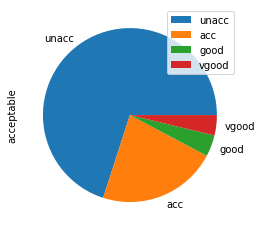

In [9]:
# acceptable 열의 분포 확인 (Pie Chart)
plt.figure(figsize=(4, 4))
data['acceptable'].value_counts().plot.pie(legend=True)

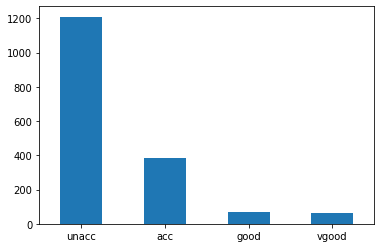

In [10]:
# acceptable 열의 분포 확인 (Bar Chart)
data['acceptable'].value_counts().plot.bar(rot=0)

## 3. 데이터 준비와 분할

In [11]:
# feature와 label로 구분
X = data.drop(['acceptable'], axis=1)
y = data.acceptable

In [12]:
X.head()

,price,maint-cost,doors,persons,trunk-size,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [13]:
# 범주형 데이터 인코더/디코더
encoder = OrdinalEncoder()

In [14]:
X_encoded = encoder.fit_transform(X)
X_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [15]:
X_decoded = encoder.inverse_transform(X_encoded)
X_decoded

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ...,
       ['low', 'low', '5more', 'more', 'big', 'low'],
       ['low', 'low', '5more', 'more', 'big', 'med'],
       ['low', 'low', '5more', 'more', 'big', 'high']], dtype=object)

In [16]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=1)

## 4. 분류기 모델 생성

In [17]:
# AutoML 도구인 FLAML을 사용하여 최적 모델 자동 판별
aml = flaml.AutoML()
aml.fit(X_train, y_train, task="classification")

[flaml.automl: 08-11 11:01:42] {2444} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 08-11 11:01:42] {2446} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 08-11 11:01:42] {2449} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 08-11 11:01:42] {2568} INFO - Minimizing error metric: log_loss
INFO:flaml.automl:Minimizing error metric: log_loss
[flaml.automl: 08-11 11:01:42] {2617} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
INFO:flaml.default.suggest:metafeature distance: 0.018901141466192435
INFO:flaml.default.suggest:metafeature distance: 0.018901141466192435
INFO:flaml.default.suggest:metafeature distance: 0.018985095288451187
INFO:flaml.default.suggest:metafeature distance: 0.01898509528845

## 5. 평가

In [18]:
y_pred = aml.predict(X_test)
y_pred[:20]

array(['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc'], dtype=object)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.98      1.00      0.99        59
        good       1.00      1.00      1.00        14
       unacc       1.00      1.00      1.00       260
       vgood       1.00      1.00      1.00        13

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



In [20]:
# 판별된 최적 알고리듬과 하이퍼매개변수
aml.best_estimator, aml.best_config

('catboost',
 {'early_stopping_rounds': 10,
  'learning_rate': 0.09999999999999996,
  'n_estimators': 436})

## 6. 모델 설명

<BarContainer object of 6 artists>

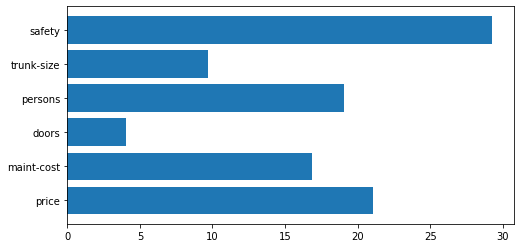

In [21]:
# 특징(feature, 피처) 중요도
plt.figure(figsize=(8, 4))
plt.barh(X.columns, aml.model.estimator.feature_importances_)

## 결론

이 실험에서는 피처 값이 수치가 아닌 범주형의 데이로 구성된 데이터집합의 예를 보았습니다.